In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
data = [
    {
        'Title' : "The Big Bang Theory",
        'Quran Reference' : "(Quran, 21:30)",
        'Surah Name' : "Surah Al-Anbya",
        'Quran Verse' : "Have those who disbelieved not considered that the heavens and the earth were a joined entity, and We separated them",
        'Scientific Reference' : "Arno Penzias and Robert Wilson",
        'Scientific Discovery' : "Around 12-15 billion years ago the universe came into existence from one single extremely hot and dense point, due to an explosion of this point the universe came into being"
    },
    {
        'Title' : "The Big Crunch Theory",
        'Quran Reference' : "(Quran, 21:104)",
        'Surah Name' : "Surah Al-Anbya",
        'Quran Verse' : "The Day when We will fold the heaven like the folding of a [written] sheet for the records. As We began the first creation, We will repeat it. [That is] a promise binding upon Us. Indeed, We will do it",
        'Scientific Reference' : "Einstein’s general relativity theory",
        'Scientific Discovery' : "The universe will be pulled back into the black holes and again form a tiny mass"
    },
    {
        'Title' : "Water",
        'Quran Reference' : "(Quran, 21:30)",
        'Surah Name' : "Surah Al-Anbya",
        'Quran Verse' : "We made every living thing from water, will they not believe",
        'Scientific Reference' : "",
        'Scientific Discovery' : "The discovery of the microscope concluded that all living things consist mostly of water"
    },
    {
        'Title' : "Embryology",
        'Quran Reference' : "(Quran, 23:12-14)",
        'Surah Name' : "Surah Al-Mu’minun",
        'Quran Verse' : "We created man from an extract of clay. Then We made him as a drop in a place of settlement, firmly fixed. Then We made the drop into an alaqah (leech, suspended thing, and blood clot), then We made the alaqah into a mudghah (chewed substance)…",
        'Scientific Reference' : "Professor Emeritus Keith L",
        'Scientific Discovery' : "According to science, a foetus gets nutrients and oxygen from the mother. In this sense, it is not unlike a leech that sucks blood. Also, in the early stages, the foetus stays stationary and the blood does not flow, which renders it similar to a blood clot. Lastly, in the womb, the baby hangs from the uterus wall by the placenta and lies suspended."
    },
    {
        'Title' : "Iron Within Meteorites",
        'Quran Reference' : "(Quran, 57:25)",
        'Surah Name' : "Surah Al-Hadid",
        'Quran Verse' : "We sent down Iron with its great inherent strength and its many benefits for humankind",
        'Scientific Reference' : "M.E. Walrath",
        'Scientific Discovery' : "iron is not an element that was naturally present on Earth. Studies suggest that a billion years ago, a meteorite struck Earth. This meteorite had iron on it, and when it exploded after coming in contact with our planet, Earth got iron"
    },
     {
        'Title' : "The Sky’s Protection",
        'Quran Reference' : "(Quran, 21:32)",
        'Surah Name' : "Surah Al-Anbya",
        'Quran Verse' : "And We made the sky a protected ceiling, but they, from its signs, are turning away",
        'Scientific Reference' : "",
        'Scientific Discovery' : "the sky, with all of its gasses, protects the earth and life that is present on it from the harmful rays of the sun"
    },
    {
        'Title' : "The Meeting of the Seas",
        'Quran Reference' : "(Quran, 55:19-20)",
        'Surah Name' : "Surah Ar-Rahman",
        'Quran Verse' : "He released the two seas, meeting [side by side], Between them is a barrier [so] neither of them transgresses",
        'Scientific Reference' : "",
        'Scientific Discovery' : "Science has discovered that in places where two different seas meet, there is a barrier that divides them which helps both the seas maintain their own temperature, salinity, as well as density"
    },
    {
        'Title' : "Sun Moving in Orbit",
        'Quran Reference' : "(Quran, 21:33)",
        'Surah Name' : "Surah Al-Anbya",
        'Quran Verse' : "And it is He who created the night and the day and the sun and the moon; all [heavenly bodies] in an orbit are swimming",
        'Scientific Reference' : "Astronomers",
        'Scientific Discovery' : "the Sun, the Moon, and all the other bodies in the Universe are moving in an orbit and constantly moving, not stationary"
    },
    {
        'Title' : "Mountains as Stakes",
        'Quran Reference' : "(Quran, 78:6-7)",
        'Surah Name' : "Surah An-Naba",
        'Quran Verse' : "Have We not made the earth a resting place? And the mountains as stakes?",
        'Scientific Reference' : "Astronomers",
        'Scientific Discovery' : "the Sun, the Moon, and all the other bodies in the Universe are moving in an orbit and constantly moving, not stationary"
    },
    {
        'Title' : "Pain Receptors",
        'Quran Reference' : "(Quran, 4:56)",
        'Surah Name' : "Surah An-Nisa",
        'Quran Verse' : "We shall send those who reject our revelations to the (hell) fire. When their skins have been burned away, We shall replace them with new ones so that they may continue to feel the pain: God is almighty, all-wise",
        'Scientific Reference' : "",
        'Scientific Discovery' : "there are pain receptors present in the skin. Without these pain receptors, a person would not be able to feel pain"
    },
    {
        'Title' : "Expansion of the Universe",
        'Quran Reference' : "(Quran, 51:47)",
        'Surah Name' : "Surah An-Nisa",
        'Quran Verse' : "And the heaven We constructed with strength, and indeed, We are [its] expander",
        'Scientific Reference' : "A Brief History of Time",
        'Scientific Discovery' : "The discovery that the universe is expanding was one of the great intellectual revolutions of the 20th century"
    },
    {
        'Title' : "Internal Waves in the Oceans",
        'Quran Reference' : "(Quran, 24:40)",
        'Surah Name' : "Surah An-Nur",
        'Quran Verse' : "Or [they are] like darknesses within an unfathomable sea which is covered by waves, upon which are waves, over which are clouds – darknesses, some of them upon others. When one puts out his hand [therein], he can hardly see it. And he to whom Allah has not granted light – for him there is no light",
        'Scientific Reference' : "Oceanographers",
        'Scientific Discovery' : "waves only occur on the surface, there are waves that take place internally in the oceans, below the surface of the water. Invisible to the human eye, these can only be detected through special equipment"
    },
    {
        'Title' : "Frontal Lobe",
        'Quran Reference' : "(Quran, 51:47)",
        'Surah Name' : "Surah Al-Alaq",
        'Quran Verse' : "No indeed! if he does not stop, We will seize him by the forehead, his lying, sinful forehead",
        'Scientific Reference' : "Essentials of Anatomy and Physiology",
        'Scientific Discovery' : "the forehead or frontal area of the brain is responsible for motivation and the foresight to plan and initiate movements"
    },
    {
        'Title' : "Formation Of Clouds",
        'Quran Reference' : "",
        'Surah Name' : "",
        'Quran Verse' : "Have you not seen how Allah makes the clouds move gently, then joins them together, then makes them into a stack, and then you see the rain come out of it?",
        'Scientific Reference' : "",
        'Scientific Discovery' : "In reality, the small clouds are pushed by the winds (moved gently), and the ones that are near each other amalgamate. At this point, a vertical updraft happens and the upper part of the cloud expands up in the sky. As a result, different parts of the cloud are raised to divergent points and look as if many clouds are piled on top of each other (stacking)"
    }
]

In [ ]:
df = pd.DataFrame(data)
df

,Title,Quran Reference,Surah Name,Quran Verse,Scientific Reference,Scientific Discovery
0,The Big Bang Theory,"(Quran, 21:30)",Surah Al-Anbya,Have those who disbelieved not considered that...,Arno Penzias and Robert Wilson,Around 12-15 billion years ago the universe ca...
1,The Big Crunch Theory,"(Quran, 21:104)",Surah Al-Anbya,The Day when We will fold the heaven like the ...,Einstein’s general relativity theory,The universe will be pulled back into the blac...
2,Water,"(Quran, 21:30)",Surah Al-Anbya,"We made every living thing from water, will th...",,The discovery of the microscope concluded that...
3,Embryology,"(Quran, 23:12-14)",Surah Al-Mu’minun,We created man from an extract of clay. Then W...,Professor Emeritus Keith L,"According to science, a foetus gets nutrients ..."
4,Iron Within Meteorites,"(Quran, 57:25)",Surah Al-Hadid,We sent down Iron with its great inherent stre...,M.E. Walrath,iron is not an element that was naturally pres...
5,The Sky’s Protection,"(Quran, 21:32)",Surah Al-Anbya,"And We made the sky a protected ceiling, but t...",,"the sky, with all of its gasses, protects the ..."
6,The Meeting of the Seas,"(Quran, 55:19-20)",Surah Ar-Rahman,"He released the two seas, meeting [side by sid...",,Science has discovered that in places where tw...
7,Sun Moving in Orbit,"(Quran, 21:33)",Surah Al-Anbya,And it is He who created the night and the day...,Astronomers,"the Sun, the Moon, and all the other bodies in..."
8,Mountains as Stakes,"(Quran, 78:6-7)",Surah An-Naba,Have We not made the earth a resting place? An...,Astronomers,"the Sun, the Moon, and all the other bodies in..."
9,Pain Receptors,"(Quran, 4:56)",Surah An-Nisa,We shall send those who reject our revelations...,,there are pain receptors present in the skin. ...


In [ ]:
# Cleaning and organizing the data
df['Quran Reference'] = df['Quran Reference'].str.replace(r'\(Quran, ([^\)]+)\)', r'\1', regex=True)
df['Quran Verse'] = df['Quran Verse'].str.replace(r'\[.*?\]', '', regex=True)
df['Scientific Discovery'] = df['Scientific Discovery'].str.replace(r'\[.*?\]', '', regex=True)
df

,Title,Quran Reference,Surah Name,Quran Verse,Scientific Reference,Scientific Discovery
0,The Big Bang Theory,21:30,Surah Al-Anbya,Have those who disbelieved not considered that...,Arno Penzias and Robert Wilson,Around 12-15 billion years ago the universe ca...
1,The Big Crunch Theory,21:104,Surah Al-Anbya,The Day when We will fold the heaven like the ...,Einstein’s general relativity theory,The universe will be pulled back into the blac...
2,Water,21:30,Surah Al-Anbya,"We made every living thing from water, will th...",,The discovery of the microscope concluded that...
3,Embryology,23:12-14,Surah Al-Mu’minun,We created man from an extract of clay. Then W...,Professor Emeritus Keith L,"According to science, a foetus gets nutrients ..."
4,Iron Within Meteorites,57:25,Surah Al-Hadid,We sent down Iron with its great inherent stre...,M.E. Walrath,iron is not an element that was naturally pres...
5,The Sky’s Protection,21:32,Surah Al-Anbya,"And We made the sky a protected ceiling, but t...",,"the sky, with all of its gasses, protects the ..."
6,The Meeting of the Seas,55:19-20,Surah Ar-Rahman,"He released the two seas, meeting , Between th...",,Science has discovered that in places where tw...
7,Sun Moving in Orbit,21:33,Surah Al-Anbya,And it is He who created the night and the day...,Astronomers,"the Sun, the Moon, and all the other bodies in..."
8,Mountains as Stakes,78:6-7,Surah An-Naba,Have We not made the earth a resting place? An...,Astronomers,"the Sun, the Moon, and all the other bodies in..."
9,Pain Receptors,4:56,Surah An-Nisa,We shall send those who reject our revelations...,,there are pain receptors present in the skin. ...


In [ ]:
df.describe()

,Title,Quran Reference,Surah Name,Quran Verse,Scientific Reference,Scientific Discovery
count,14,14,14,14,14,14
unique,14,12,9,14,9,13
top,The Big Bang Theory,21:30,Surah Al-Anbya,Have those who disbelieved not considered that...,,"the Sun, the Moon, and all the other bodies in..."
freq,1,2,5,1,5,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 14 non-null     object
 1   Quran Reference       14 non-null     object
 2   Surah Name            14 non-null     object
 3   Quran Verse           14 non-null     object
 4   Scientific Reference  14 non-null     object
 5   Scientific Discovery  14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


Surah Name Counts:
Surah Al-Anbya       5
Surah An-Nisa        2
Surah Al-Mu’minun    1
Surah Al-Hadid       1
Surah Ar-Rahman      1
Surah An-Naba        1
Surah An-Nur         1
Surah Al-Alaq        1
                     1
Name: Surah Name, dtype: int64


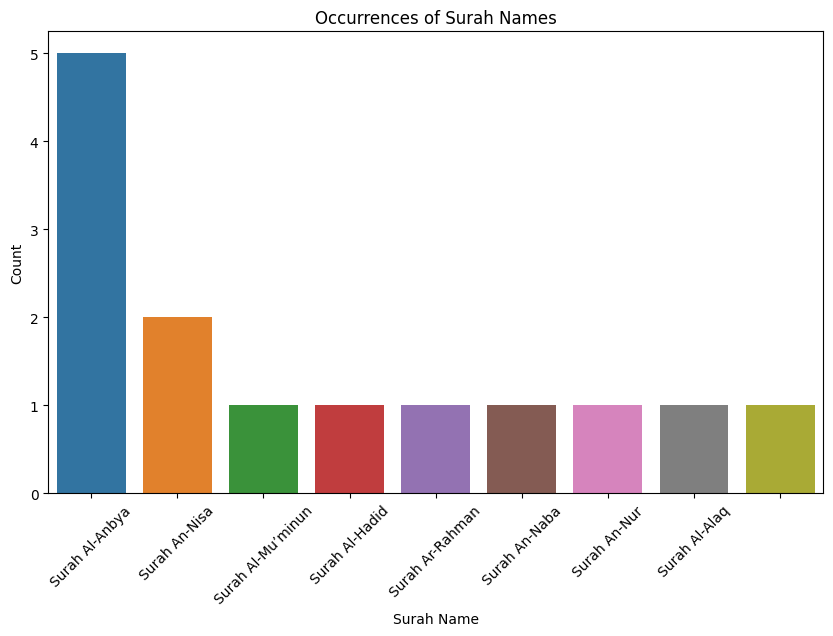

In [ ]:
# Count the occurrences of each Surah Name
surah_counts = df['Surah Name'].value_counts()
print("Surah Name Counts:")
print(surah_counts)

# Create a bar plot for the count of Surah Names
plt.figure(figsize=(10, 6))
sns.barplot(x=surah_counts.index, y=surah_counts.values)
plt.title("Occurrences of Surah Names")
plt.xlabel("Surah Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

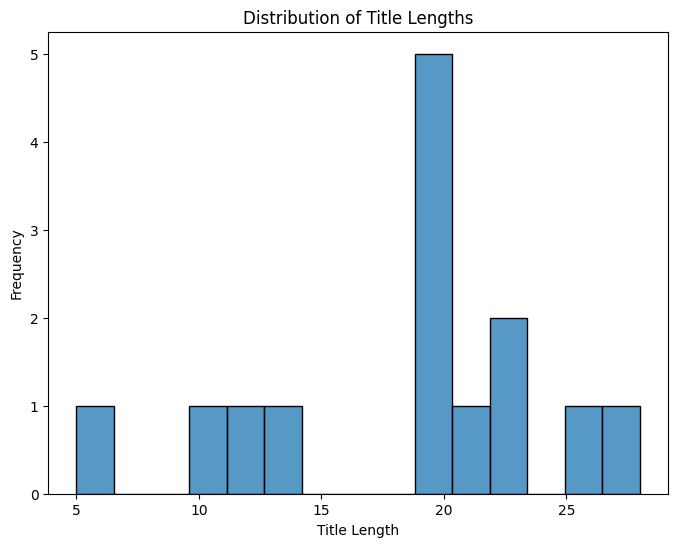

In [ ]:
# Visualize the distribution of Title lengths
df['Title Length'] = df['Title'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Title Length', bins=15)
plt.title("Distribution of Title Lengths")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.show()

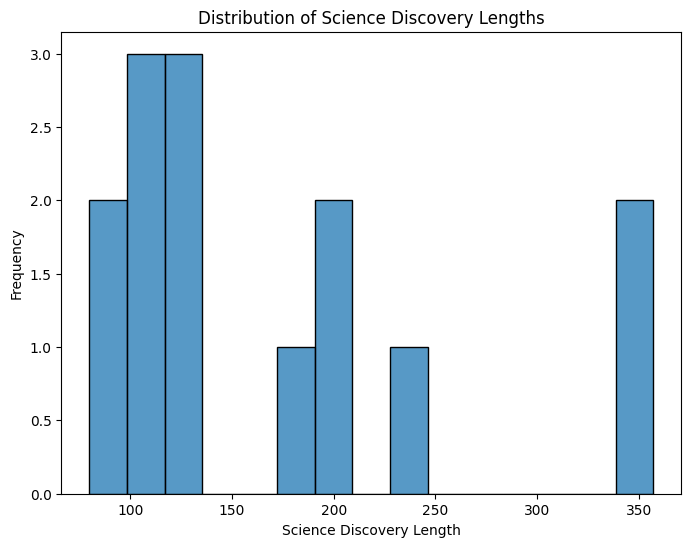

In [ ]:
df['Science Discovery Length'] = df['Scientific Discovery'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Science Discovery Length', bins=15)
plt.title("Distribution of Science Discovery Lengths")
plt.xlabel("Science Discovery Length")
plt.ylabel("Frequency")
plt.show()

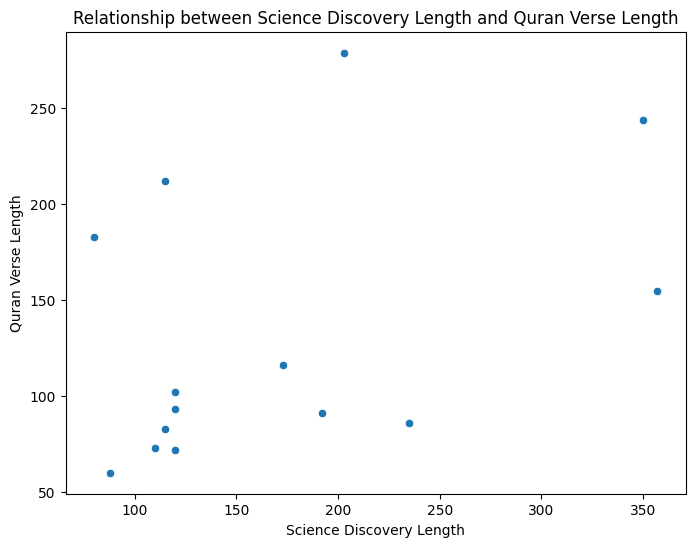

In [ ]:
df['Quran Verse Length'] = df['Quran Verse'].apply(len)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Science Discovery Length', y='Quran Verse Length')
plt.title("Relationship between Science Discovery Length and Quran Verse Length")
plt.xlabel("Science Discovery Length")
plt.ylabel("Quran Verse Length")
plt.show()

In [ ]:
df['Combined_Text'] = df['Scientific Discovery'] + ' ' + df['Quran Verse']

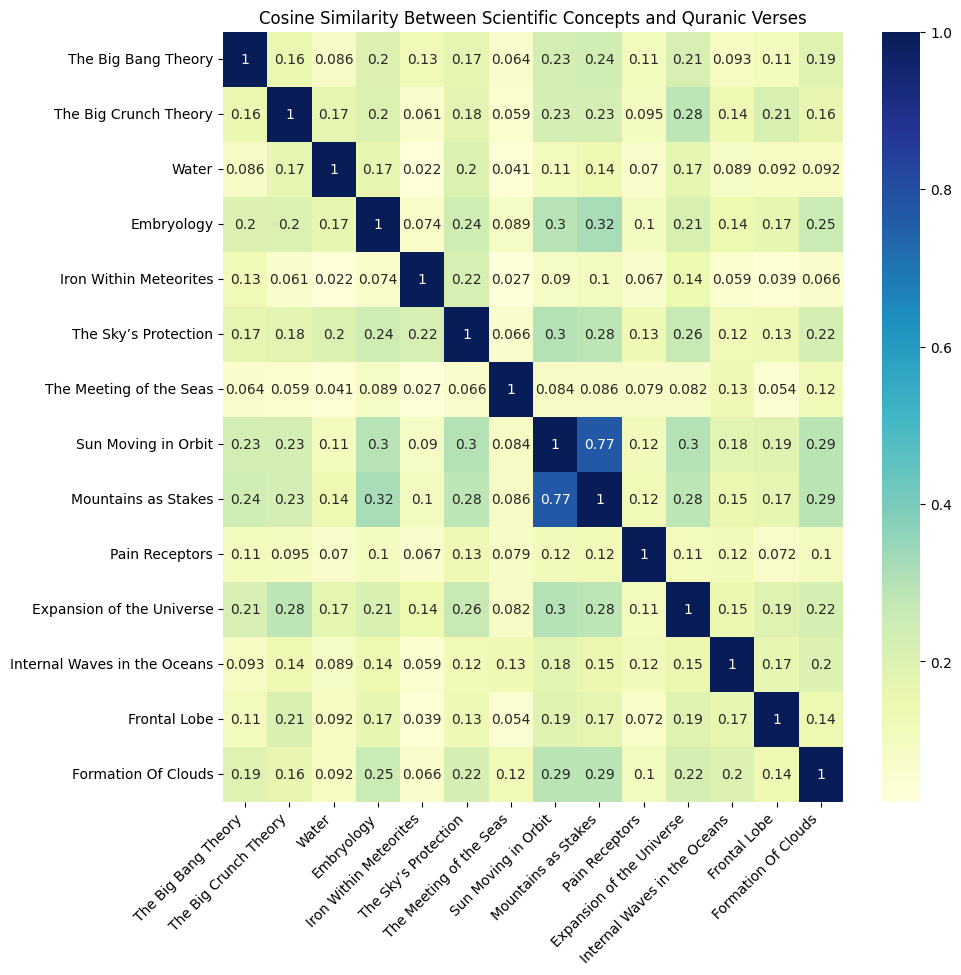

In [ ]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df['Combined_Text'])

cosine_similarities = cosine_similarity(tfidf_matrix)

# Create a heatmap of cosine similarities
plt.figure(figsize=(10, 10))
sns.heatmap(cosine_similarities, annot=True, cmap="YlGnBu", xticklabels=df['Title'], yticklabels=df['Title'])
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title('Cosine Similarity Between Scientific Concepts and Quranic Verses')
plt.show()

In [ ]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['Combined_Text'])

num_topics = len(df)
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: will, with, discovery, of, present, is, earth, concluded, believe, things
Topic 2: will, with, discovery, of, present, is, earth, concluded, believe, things
Topic 3: the, and, we, in, will, all, not, pain, moving, are
Topic 4: will, with, discovery, of, present, is, earth, concluded, believe, things
Topic 5: the, waves, are, which, is, of, he, there, to, upon
Topic 6: the, forehead, and, will, for, he, not, indeed, him, if
Topic 7: will, with, discovery, of, present, is, earth, concluded, believe, things
Topic 8: will, with, discovery, of, present, is, earth, concluded, believe, things
Topic 9: will, with, discovery, of, present, is, earth, concluded, believe, things
Topic 10: the, of, we, and, discovery, with, one, universe, indeed, heaven
Topic 11: that, iron, earth, is, them, seas, with, its, on, as
Topic 12: will, with, discovery, of, present, is, earth, concluded, believe, things
Topic 13: the, and, of, from, we, in, then, made, into, not
Topic 14: will, with, discovery, 

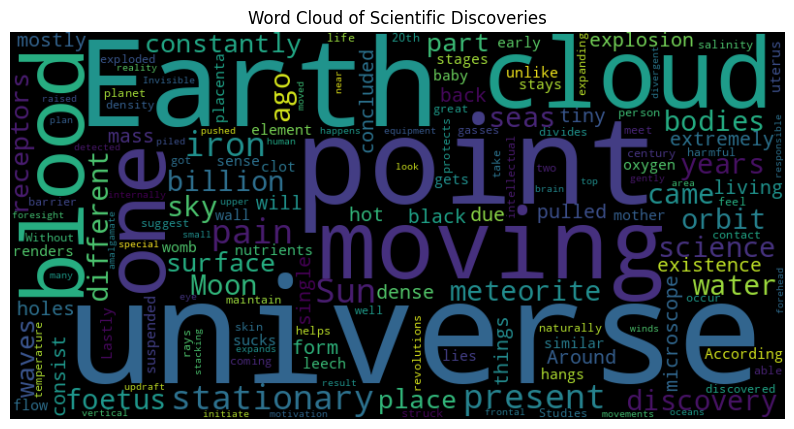

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(df['Scientific Discovery']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Scientific Discoveries")
plt.axis('off')
plt.show()

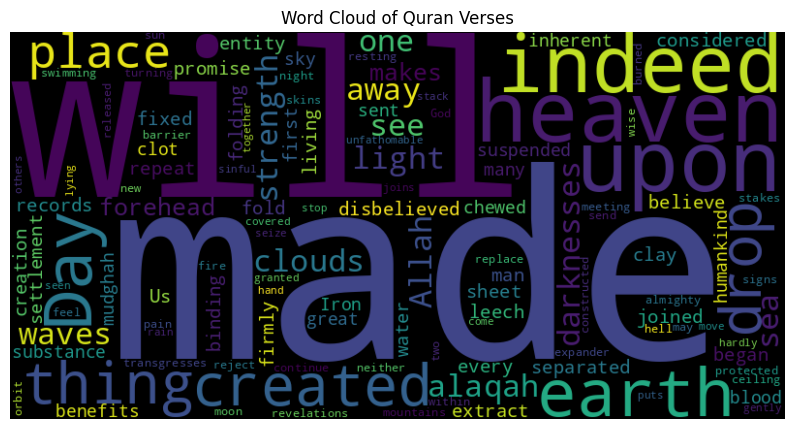

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(df['Quran Verse']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Quran Verses")
plt.axis('off')
plt.show()

# **Project Documentation: Investigating the Relationship Between Science and Islam**

## **Data Sources**
The data used for this analysis includes a collection of scientific advancements and corresponding Quranic verses from websites:


1.   https://zamzam.com/blog/scientific-facts-in-quran/
2.   https://themuslimvibe.com/faith-islam/13-scientific-facts-in-the-holy-quran



## **Data Preprocessing**
**Combining Texts:** The text from the 'Scientific Discovery' and 'Quran Verse' columns were combined to create a 'Combined_Text' column. This facilitated the analysis of textual similarities between scientific concepts and Quranic teachings.

## **Analysis Methods**
**TF-IDF Vectorization:** The TfidfVectorizer from the sklearn.feature_extraction.text library was used to transform the combined text data into a TF-IDF matrix. This matrix captured the importance of words in the text data relative to the entire dataset.

**Cosine Similarity:** The cosine similarity between pairs of text data was calculated using the cosine_similarity function from the sklearn.metrics.pairwise module. The resulting matrix provided a measure of similarity between the text pairs.

**Latent Dirichlet Allocation (LDA):** LDA, a topic modeling technique, was applied using the LatentDirichletAllocation class from the sklearn.decomposition module. This technique helped identify latent topics in the combined text data.

## **Findings**
**Cosine Similarity Heatmap:** The heatmap of cosine similarities visually displayed the textual similarities between scientific advancements and Quranic verses. Darker squares indicated higher levels of similarity. This heatmap provided an overview of relationships and potential alignments between the two domains.


## **Interpretations**
The analysis highlighted specific scientific advancements that align with certain Quranic teachings, suggesting thematic connections between the two domains.

Common themes and topics identified through LDA indicated shared concepts between science and Islam, emphasizing the potential harmony between scientific knowledge and religious teachings.

## **Conclusion**
The project successfully investigated the relationship between scientific advancements and Islamic teachings through data analysis. By employing TF-IDF vectorization and LDA, the project identified textual similarities and common themes, fostering a deeper understanding of the intersections between science and Islam. The findings provide valuable insights into the potential correlations and connections between these domains. It is noted that Surah Al-Anbya and Surah An-Naba found the most similarity with scientific discoveries. Overall, All the Surahs showed a significant amount of cosine_similarities.